## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9606716	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8558633	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8400199	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8229065	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8057776	total: 68.1ms	remaining: 6.12s
11:	learn: 0.7907426	total: 69ms	remaining: 5.68s
12:	learn: 0.7753485	total: 70ms	remaining: 5.32s
13:	learn: 0.7601130	total: 70.9ms	remaining: 4.99s
14:	learn: 0.7475256	total: 71.8ms	remaining: 4.72s
15:	learn: 0.7326054	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7206853	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7077303	total: 74.2ms	remaining: 4.05s
18:	learn: 0.6955287	total: 74.9ms	remaining: 3.

101:	learn: 0.3059717	total: 147ms	remaining: 1.29s
102:	learn: 0.3044976	total: 148ms	remaining: 1.28s
103:	learn: 0.3030824	total: 149ms	remaining: 1.28s
104:	learn: 0.3013455	total: 149ms	remaining: 1.27s
105:	learn: 0.2996238	total: 150ms	remaining: 1.27s
106:	learn: 0.2980370	total: 151ms	remaining: 1.26s
107:	learn: 0.2965967	total: 152ms	remaining: 1.25s
108:	learn: 0.2951864	total: 153ms	remaining: 1.25s
109:	learn: 0.2942861	total: 154ms	remaining: 1.24s
110:	learn: 0.2932928	total: 154ms	remaining: 1.24s
111:	learn: 0.2916150	total: 155ms	remaining: 1.23s
112:	learn: 0.2903158	total: 156ms	remaining: 1.22s
113:	learn: 0.2893044	total: 157ms	remaining: 1.22s
114:	learn: 0.2880453	total: 157ms	remaining: 1.21s
115:	learn: 0.2868924	total: 158ms	remaining: 1.21s
116:	learn: 0.2854905	total: 159ms	remaining: 1.2s
117:	learn: 0.2838426	total: 160ms	remaining: 1.2s
118:	learn: 0.2827228	total: 161ms	remaining: 1.19s
119:	learn: 0.2820207	total: 162ms	remaining: 1.18s
120:	learn: 0.

155:	learn: 0.2490613	total: 192ms	remaining: 1.04s
156:	learn: 0.2484356	total: 193ms	remaining: 1.03s
157:	learn: 0.2475208	total: 194ms	remaining: 1.03s
158:	learn: 0.2467460	total: 195ms	remaining: 1.03s
159:	learn: 0.2461317	total: 195ms	remaining: 1.02s
160:	learn: 0.2456028	total: 196ms	remaining: 1.02s
161:	learn: 0.2449256	total: 197ms	remaining: 1.02s
162:	learn: 0.2444113	total: 198ms	remaining: 1.01s
163:	learn: 0.2438126	total: 199ms	remaining: 1.01s
164:	learn: 0.2432080	total: 199ms	remaining: 1.01s
165:	learn: 0.2425986	total: 200ms	remaining: 1s
166:	learn: 0.2421108	total: 201ms	remaining: 1s
167:	learn: 0.2413956	total: 202ms	remaining: 1s
168:	learn: 0.2407630	total: 203ms	remaining: 998ms
169:	learn: 0.2401529	total: 204ms	remaining: 995ms
170:	learn: 0.2391465	total: 205ms	remaining: 992ms
171:	learn: 0.2383087	total: 206ms	remaining: 989ms
172:	learn: 0.2377594	total: 206ms	remaining: 986ms
173:	learn: 0.2373192	total: 207ms	remaining: 984ms
174:	learn: 0.2367045

318:	learn: 0.1709797	total: 338ms	remaining: 722ms
319:	learn: 0.1706233	total: 339ms	remaining: 721ms
320:	learn: 0.1703284	total: 340ms	remaining: 719ms
321:	learn: 0.1700544	total: 341ms	remaining: 718ms
322:	learn: 0.1696955	total: 342ms	remaining: 717ms
323:	learn: 0.1695203	total: 343ms	remaining: 715ms
324:	learn: 0.1693707	total: 344ms	remaining: 714ms
325:	learn: 0.1690932	total: 345ms	remaining: 712ms
326:	learn: 0.1687871	total: 345ms	remaining: 711ms
327:	learn: 0.1684932	total: 346ms	remaining: 710ms
328:	learn: 0.1680740	total: 347ms	remaining: 708ms
329:	learn: 0.1676495	total: 348ms	remaining: 707ms
330:	learn: 0.1672606	total: 350ms	remaining: 707ms
331:	learn: 0.1669891	total: 350ms	remaining: 705ms
332:	learn: 0.1666284	total: 351ms	remaining: 704ms
333:	learn: 0.1664670	total: 353ms	remaining: 704ms
334:	learn: 0.1660441	total: 354ms	remaining: 702ms
335:	learn: 0.1657088	total: 355ms	remaining: 701ms
336:	learn: 0.1653987	total: 355ms	remaining: 699ms
337:	learn: 

367:	learn: 0.1573862	total: 382ms	remaining: 657ms
368:	learn: 0.1572274	total: 384ms	remaining: 656ms
369:	learn: 0.1568606	total: 384ms	remaining: 654ms
370:	learn: 0.1564609	total: 385ms	remaining: 653ms
371:	learn: 0.1560608	total: 386ms	remaining: 652ms
372:	learn: 0.1558547	total: 387ms	remaining: 650ms
373:	learn: 0.1555605	total: 388ms	remaining: 649ms
374:	learn: 0.1552292	total: 388ms	remaining: 647ms
375:	learn: 0.1549435	total: 389ms	remaining: 646ms
376:	learn: 0.1546544	total: 390ms	remaining: 645ms
377:	learn: 0.1543066	total: 391ms	remaining: 643ms
378:	learn: 0.1540311	total: 392ms	remaining: 642ms
379:	learn: 0.1536233	total: 393ms	remaining: 641ms
380:	learn: 0.1533239	total: 394ms	remaining: 640ms
381:	learn: 0.1530299	total: 395ms	remaining: 639ms
382:	learn: 0.1528336	total: 395ms	remaining: 637ms
383:	learn: 0.1526162	total: 396ms	remaining: 636ms
384:	learn: 0.1523426	total: 397ms	remaining: 635ms
385:	learn: 0.1521042	total: 398ms	remaining: 633ms
386:	learn: 

537:	learn: 0.1223317	total: 529ms	remaining: 454ms
538:	learn: 0.1221160	total: 530ms	remaining: 453ms
539:	learn: 0.1219316	total: 531ms	remaining: 452ms
540:	learn: 0.1217415	total: 532ms	remaining: 451ms
541:	learn: 0.1214753	total: 533ms	remaining: 450ms
542:	learn: 0.1212860	total: 534ms	remaining: 449ms
543:	learn: 0.1211131	total: 535ms	remaining: 448ms
544:	learn: 0.1208536	total: 535ms	remaining: 447ms
545:	learn: 0.1207734	total: 536ms	remaining: 446ms
546:	learn: 0.1205887	total: 537ms	remaining: 445ms
547:	learn: 0.1203470	total: 538ms	remaining: 444ms
548:	learn: 0.1201638	total: 539ms	remaining: 443ms
549:	learn: 0.1200067	total: 540ms	remaining: 442ms
550:	learn: 0.1198272	total: 541ms	remaining: 440ms
551:	learn: 0.1195666	total: 541ms	remaining: 439ms
552:	learn: 0.1194183	total: 542ms	remaining: 438ms
553:	learn: 0.1191881	total: 543ms	remaining: 437ms
554:	learn: 0.1189026	total: 544ms	remaining: 436ms
555:	learn: 0.1187021	total: 545ms	remaining: 435ms
556:	learn: 

587:	learn: 0.1134748	total: 573ms	remaining: 401ms
588:	learn: 0.1134371	total: 574ms	remaining: 400ms
589:	learn: 0.1131994	total: 575ms	remaining: 400ms
590:	learn: 0.1130597	total: 576ms	remaining: 399ms
591:	learn: 0.1128132	total: 577ms	remaining: 398ms
592:	learn: 0.1126699	total: 578ms	remaining: 397ms
593:	learn: 0.1125247	total: 579ms	remaining: 395ms
594:	learn: 0.1123135	total: 579ms	remaining: 394ms
595:	learn: 0.1120719	total: 580ms	remaining: 393ms
596:	learn: 0.1118641	total: 581ms	remaining: 392ms
597:	learn: 0.1116640	total: 582ms	remaining: 391ms
598:	learn: 0.1114721	total: 583ms	remaining: 390ms
599:	learn: 0.1113192	total: 584ms	remaining: 389ms
600:	learn: 0.1111923	total: 585ms	remaining: 388ms
601:	learn: 0.1109718	total: 585ms	remaining: 387ms
602:	learn: 0.1108705	total: 586ms	remaining: 386ms
603:	learn: 0.1106417	total: 587ms	remaining: 385ms
604:	learn: 0.1104217	total: 588ms	remaining: 384ms
605:	learn: 0.1103460	total: 589ms	remaining: 383ms
606:	learn: 

735:	learn: 0.0930800	total: 704ms	remaining: 252ms
736:	learn: 0.0929764	total: 705ms	remaining: 251ms
737:	learn: 0.0928240	total: 706ms	remaining: 250ms
738:	learn: 0.0927183	total: 706ms	remaining: 249ms
739:	learn: 0.0925957	total: 707ms	remaining: 248ms
740:	learn: 0.0925025	total: 708ms	remaining: 247ms
741:	learn: 0.0923401	total: 709ms	remaining: 246ms
742:	learn: 0.0923163	total: 710ms	remaining: 245ms
743:	learn: 0.0921469	total: 711ms	remaining: 244ms
744:	learn: 0.0920264	total: 711ms	remaining: 243ms
745:	learn: 0.0918709	total: 712ms	remaining: 242ms
746:	learn: 0.0917286	total: 713ms	remaining: 241ms
747:	learn: 0.0916813	total: 714ms	remaining: 241ms
748:	learn: 0.0915730	total: 715ms	remaining: 239ms
749:	learn: 0.0915436	total: 715ms	remaining: 238ms
750:	learn: 0.0914450	total: 716ms	remaining: 238ms
751:	learn: 0.0912826	total: 717ms	remaining: 237ms
752:	learn: 0.0911103	total: 719ms	remaining: 236ms
753:	learn: 0.0909450	total: 720ms	remaining: 235ms
754:	learn: 

785:	learn: 0.0871866	total: 748ms	remaining: 204ms
786:	learn: 0.0870605	total: 750ms	remaining: 203ms
787:	learn: 0.0869480	total: 751ms	remaining: 202ms
788:	learn: 0.0868796	total: 752ms	remaining: 201ms
789:	learn: 0.0867424	total: 753ms	remaining: 200ms
790:	learn: 0.0866955	total: 754ms	remaining: 199ms
791:	learn: 0.0865584	total: 755ms	remaining: 198ms
792:	learn: 0.0864905	total: 756ms	remaining: 197ms
793:	learn: 0.0863819	total: 757ms	remaining: 196ms
794:	learn: 0.0863573	total: 758ms	remaining: 195ms
795:	learn: 0.0862351	total: 759ms	remaining: 194ms
796:	learn: 0.0861251	total: 760ms	remaining: 193ms
797:	learn: 0.0860579	total: 760ms	remaining: 193ms
798:	learn: 0.0860072	total: 761ms	remaining: 192ms
799:	learn: 0.0859006	total: 762ms	remaining: 191ms
800:	learn: 0.0858199	total: 763ms	remaining: 190ms
801:	learn: 0.0856808	total: 764ms	remaining: 189ms
802:	learn: 0.0855259	total: 765ms	remaining: 188ms
803:	learn: 0.0854329	total: 766ms	remaining: 187ms
804:	learn: 

951:	learn: 0.0722875	total: 895ms	remaining: 45.1ms
952:	learn: 0.0721778	total: 896ms	remaining: 44.2ms
953:	learn: 0.0721051	total: 897ms	remaining: 43.2ms
954:	learn: 0.0719889	total: 897ms	remaining: 42.3ms
955:	learn: 0.0719137	total: 898ms	remaining: 41.3ms
956:	learn: 0.0718347	total: 899ms	remaining: 40.4ms
957:	learn: 0.0717643	total: 900ms	remaining: 39.5ms
958:	learn: 0.0716632	total: 901ms	remaining: 38.5ms
959:	learn: 0.0716285	total: 902ms	remaining: 37.6ms
960:	learn: 0.0716086	total: 902ms	remaining: 36.6ms
961:	learn: 0.0715439	total: 903ms	remaining: 35.7ms
962:	learn: 0.0714557	total: 904ms	remaining: 34.7ms
963:	learn: 0.0713766	total: 905ms	remaining: 33.8ms
964:	learn: 0.0713120	total: 906ms	remaining: 32.8ms
965:	learn: 0.0712524	total: 906ms	remaining: 31.9ms
966:	learn: 0.0711092	total: 907ms	remaining: 31ms
967:	learn: 0.0710991	total: 908ms	remaining: 30ms
968:	learn: 0.0709569	total: 909ms	remaining: 29.1ms
969:	learn: 0.0708275	total: 910ms	remaining: 28.1

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24134345236421856


#### Sanity Checks 

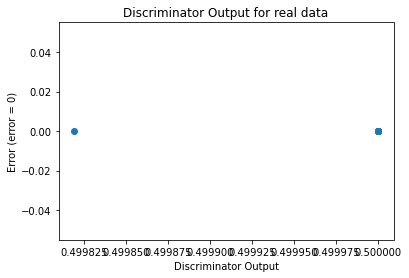

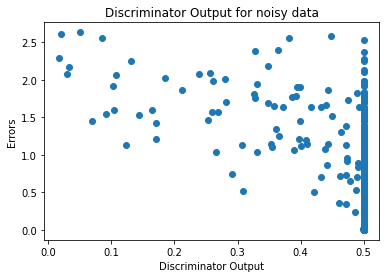

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 53


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.08556079204608058


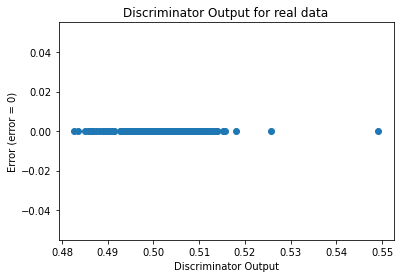

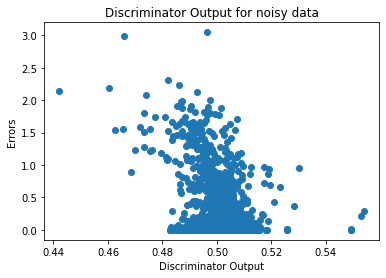

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.015641881416507738


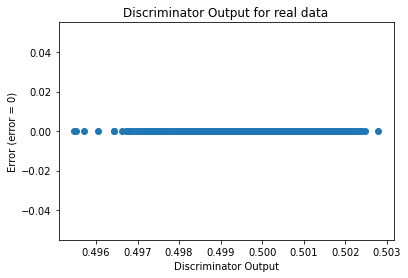

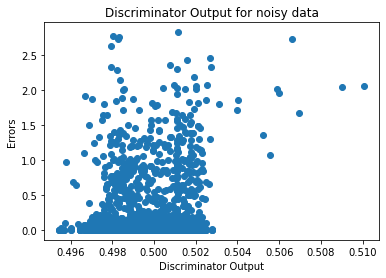

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0331]], requires_grad=True)
